# CAP 5610 - Introduction to Machine Learning <br>Florida International University - Summer 2019
## Problem Set #4
### Instructions:

Please answer the questions below. Copy this notebook and submit your answers under each problem, inserting cells as needed. You may use a combination of [python](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](http://data-blog.udacity.com/posts/2016/10/latex-primer/) to formulate your responses. Please add your initials to the file name prior to submission. For example, if your name is Juana Perez, you would use the following filename: problem_set_4_JP.ipynb. Prior to completing this assignment, you should complete all of the items in the Reinforcement Learning module.

#### Problem 1. **[10 points]** Policy Iteration

Using the GridWorld implementation discussed in the example sets (https://github.com/drmaj/gridworldsgym), implement the policy iteration algorithm. Verify that the algorithm works on GridWorld-v0 and then test it on the remaining gridworlds.

In [1]:
%matplotlib inline
import time
import gym
import gridworldsgym 
import numpy as np
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,12]

def value_iteration(env, gamma=0.999, epsilon=0.001):
    states = [s for s in range(env.num_states)]
    actions = [a for a in range(env.num_actions)]
    V1 = {s: 0 for s in states}
    R, P = env.R, env.P

    while True:
        V = V1.copy()
        delta = 0
        for s in states:
            V1[s] = R(s) + gamma * max(sum(p * V1[s_prime] for (p, s_prime, done) in P(s, a)) for a in actions)
            delta = max(delta, abs(V1[s] - V[s]))

        if delta <= epsilon * (1 - gamma) / gamma:
            return V

def policy_iteration(env, gamma=0.999, epsilon=0.001):
    states = [s for s in range(env.num_states)]
    actions = [a for a in range(env.num_actions)]
    R, P = env.R, env.P
    policy = [0 for s in range(env.num_states)]
    V = {s: 0 for s in states}

    is_value_changed = True
    iterations = 0
    while is_value_changed:
        is_value_changed = False
        iterations += 1
        for s in states:
            iterations += 1
            V[s] = R(s) + gamma * max(sum(p * V[s_prime] for (p, s_prime, done) in P(s, a)) for a in actions)
            
        for s in states:
            q_best = V[s]
            for a in actions:
                q_sa = sum(p * V[s_prime] for (p, s_prime, done) in P(s, a))
                if q_sa > q_best:
                    print ("State", s, ": q_sa", q_sa, "q_best", q_best)
                    policy[s] = a
                    q_best = q_sa
                    is_value_changed = True
        return V
        
def pretty_print(V, env):
    grid = np.zeros((env.height, env.width))
    for state, value in V.items():
        row, col = env.to_row_col(state)
        grid[row][col] = value
    print(grid)
    
def pi_star(state, P, V):
    actions = [a for a in range(env.num_actions)]
    action_values = []
    for action in actions:
        transitions = env.P(state, action)
        action_value = 0
        for p, next_state, _ in transitions:
            action_value += p * V[next_state]
        action_values.append(action_value)

    return np.argmax(action_values)

In [2]:
env = gym.make('GridWorld-v0')
state = env.reset()

In [3]:
V = policy_iteration(env)

In [4]:
pretty_print(V,env)

[[ 0.79540959  0.83624584  0.87712296  0.83624584]
 [ 0.83624584         nan  0.918041   -1.        ]
 [ 0.87712296  0.918041    0.959       1.        ]]


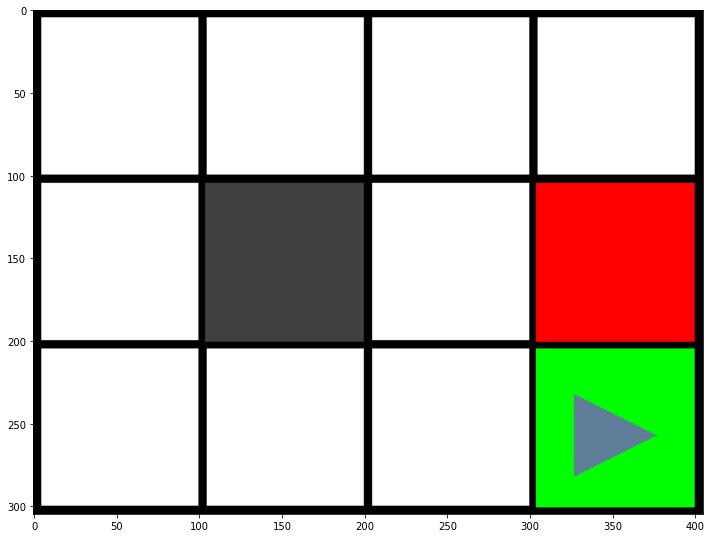

In [5]:
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
actions = [a for a in range(env.num_actions)]
done = False
time.sleep(0.5)
while not done:
    action = pi_star(state, env.P, V)
    state, reward, done, info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.5)
    
env.close()
env = None

#### Problem 2. **[10 points]** Additional Questions

* How does policy iteration compare with value iteration, in terms of speed of convergence and final policy performance?
* Do they arrive at the same solution for the MDPs tested?
* Read the following: https://towardsdatascience.com/training-an-agent-to-beat-grid-world-fac8a48109a8. What is Q-learning and how does it compare to Value Iteration and Policy Iteration for solving grid world MDPs?

Policy iteration starts with a random policy, then finds the value function of that policy. After that, it it finds a new improved policy based on the previous value function, and so on. It is guaranteed to converge to the optimal policy, and it often takes less iterations to converge than the value iteration algorithm, which makes it faster than value iteration in most of the cases.

Value iteration it starts with a random value function, and then finds a new improved value function in a iterative process, untilreaching the optimal value function. Value iteration is guaranteed to converge to the optimal values.

It depends on the MDP tested. They could arrive to the same solution, and sometimes they will have different solutions.

Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state. It’s considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn’t needed. More specifically, q-learning seeks to learn a policy that maximizes the total reward. The ‘q’ in q-learning stands for quality. Quality in this case represents how useful a given action is in gaining some future reward.

This is different from Value Iteration and Policy Iteration as it does not care about the current policy and puts a bigger emphasis on random actions in order to find the best policy in a given state.